<div style="direction:rtl"> نام و نام خانوادگی: علیرضا آقایی </div>
<div style="direction:rtl"> شماره دانشجویی: ۸۱۰۱۹۷۶۷۹ </div>

<div style="direction:rtl"> کتاب خانه‌های لازم برای اجرای کدها را import می‌کنیم: </div>

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, cos, sin
import random

<div style="direction:rtl"> تابع کشیدن خط برای رسم خط‌های به دست آمده از شبکه ها: </div>

In [64]:
def drawLine(w, col='green'):
    l1 = -w[1] / w[2]
    l0 = -w[0] / w[2]
    x_line = np.linspace(-6 , 6 , 40)
    plt.plot(x_line, l1 * x_line + l0, color = col)

<div style="direction:rtl"> کلاس نورون که در پیاده‌سازی همه‌ی شبکه‌ها از آن استفاده می‌شود: </div>

In [65]:
class Neuron:
    def __init__(self, theta, activationFunction, inputNeuronsList=None, weightsList=None):
        self._inputNeuronsList = inputNeuronsList
        self._weightsList = weightsList
        self.net_in = 0
        self.output = 0
        self._theta = theta
        self._activationFunction = activationFunction
        
    def setOutput(self, outputValue):
        self.output = outputValue
    
    def setWeights(self, weightsList):
        self._weightsList = weightsList
    
    def getWeights(self):
        return self._weightsList
    
    def calculateNet(self):
        net = 0
        for i in range(len(self._weightsList)):
            net += self._inputNeuronsList[i].output * self._weightsList[i]
        return net
    
    def calculateOutput(self):
        net = 0
        for i in range(len(self._weightsList)):
            net += self._inputNeuronsList[i].output * self._weightsList[i]
        self.net_in = net
        self.output = self._activationFunction(net, self._theta)
        return self.output

<div style="direction:rtl"> <b> سوال ۱) </b> </div>
<div style="direction:rtl"> شبکه عصبی طراحی شده را پیاده سازی می‌کنیم: </div>

In [66]:
class MyMccullochPitts:
    def __init__(self):
        self.x1 = Neuron(theta=2, activationFunction = self._activationFunction)
        self.x2 = Neuron(theta=2, activationFunction = self._activationFunction)

        self.z1 = Neuron(inputNeuronsList=[self.x1, self.x2] , weightsList=[(-10/3), (2/3)], theta=2, activationFunction = self._activationFunction)
        self.z2 = Neuron(inputNeuronsList=[self.x1 , self.x2], weightsList=[(10/21), (4/21)], theta=2, activationFunction = self._activationFunction)
        self.z3 = Neuron(inputNeuronsList=[self.x2], weightsList=[-1], theta=2, activationFunction = self._activationFunction)
        self.z4 = Neuron(inputNeuronsList=[self.x2], weightsList=[2/3], theta=2, activationFunction = self._activationFunction)
        
        self.Y = Neuron(inputNeuronsList=[self.z1, self.z2, self.z3, self.z4], weightsList=[2, 2, 2, 2], theta=2, activationFunction = self._activationFunction)
    
    def _activationFunction(self, net, theta):
        return int(net >= theta)
    
    def calculateOutput(self, in1, in2):
        self.x1.setOutput(in1)
        self.x2.setOutput(in2)

        self.z1.calculateOutput()
        self.z2.calculateOutput()
        self.z3.calculateOutput()
        self.z4.calculateOutput()

        return self.Y.calculateOutput()

<div style="direction:rtl"> حال برای تست شبکه‌ی خود چند نقطه را به عنوان ورودی می‌دهیم و اگر شبکه آن‌ها را داخل تشخیص داد با رنگ سبز و در غیر این صورت با رنگ قرمز روی صفحه مشخص می‌کنیم: </div>

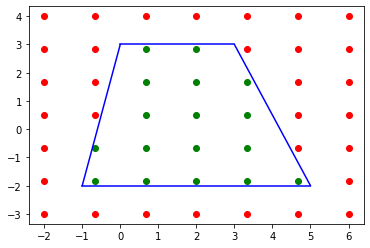

In [67]:
POLYGON_SIDES_CNT = 4
polygonPoints = [(0, 3), (3, 3), (5, -2), (-1, -2)]

mpNetwork = MyMccullochPitts()

for i in range(len(polygonPoints)):
    x = [polygonPoints[i][0], polygonPoints[(i + 1) % POLYGON_SIDES_CNT][0]]
    y = [polygonPoints[i][1], polygonPoints[(i + 1) % POLYGON_SIDES_CNT][1]]
    plt.plot(x , y, color = 'blue')

xPoints = np.linspace(-2, 6, 7)
yPoints = np.linspace(-3, 4, 7)

testPoints = [[[], []] , [[] , []]]
for x in xPoints:
    for y in yPoints:
        result = mpNetwork.calculateOutput(x , y)
        testPoints[result][0].append(x)
        testPoints[result][1].append(y)
plt.scatter(testPoints[0][0], testPoints[0][1], color = 'green')
plt.scatter(testPoints[1][0], testPoints[1][1], color = 'red')
plt.show()

<div style="direction:rtl"> <b> سوال ۲) </b> </div>
<div style="direction:rtl"> داده ها را متناسب با فرض سوال تولید می‌کنیم: </div>

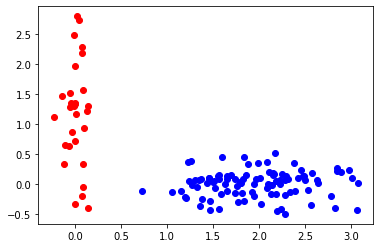

In [68]:
x1 = np.random.normal(2, 0.5, 100)
y1 = np.random.normal(0, 0.2, 100)

x2 = np.random.normal(0, 0.1, 30)
y2 = np.random.normal(1, 0.7, 30)

plt.scatter(x1, y1, color = 'blue')
plt.scatter(x2, y2, color = 'red')
plt.show()

<div style="direction:rtl"> کلاس مربوط به شبکه‌ی آدلاین را پیاده‌سازی می‌کنیم: </div>

In [69]:
class MyAdaline:
    def __init__(self, inputCnt, lr):
        self._inputCnt = inputCnt
        self._lr = lr
        self.inputNeuronsList = []
        for i in range(inputCnt + 1):
            self.inputNeuronsList.append(Neuron(theta = 0, activationFunction= self._activationFunction))
        self.inputNeuronsList[0].setOutput(1)
        self.Y = Neuron(theta = 0, activationFunction = self._activationFunction, inputNeuronsList=self.inputNeuronsList, weightsList=[0 for i in range(inputCnt + 1)])
    
    def _activationFunction(self, net, theta=0):
        return net
    
    def _calculateNetworkOutput(self, inputValues):
        for i in range(0, self._inputCnt):
            self.inputNeuronsList[i + 1].setOutput(inputValues[i])
        return self.Y.calculateOutput()
    
    def _initialWeights(self):
        newWeights = [0 for i in range(self._inputCnt + 1)]
        for i in range(self._inputCnt + 1):
            newWeights[i] = random.random()
        self.Y.setWeights(newWeights)
            
    def _updateWeights(self, net, target, inputValues):
        oldWeights = self.Y.getWeights()
        newWeights = [0 for i in range(self._inputCnt + 1)]
        
        newWeights[0] = oldWeights[0] + self._lr * (target - net)
        for i in range(self._inputCnt):
            newWeights[i + 1] = oldWeights[i + 1] + self._lr * (target - net) * inputValues[i]
        self.Y.setWeights(newWeights)
        
    def _calculateCostFunction(self, inputList, targetList):
        newJ = 0
        for i in range(len(inputList)):
            net = self._calculateNetworkOutput(inputList[i])
            newJ += ((targetList[i] - net) ** 2)
        return 0.5 * newJ
    
    def _checkEnd(self, J):
        if len(J) == 0:
            return False
        elif len(J) == 1:
            return J[0] == 0
        
        if abs(J[-1] - J[-2]) < 0.00001:
            return True
        return False
    
    def train(self, inputList, targetList):
        self._initialWeights()
        J = []
        while not self._checkEnd(J):
            for i in range(len(inputList)):
                net = self._calculateNetworkOutput(inputList[i])
                self._updateWeights(net, targetList[i], inputList[i])
            J.append(self._calculateCostFunction(inputList, targetList))
        return J, self.Y.getWeights()
    

<div style="direction:rtl"> حال شبکه‌ی آدلاین را بر اساس داده‌های تولید شده در ابتدای کار آموزش می‌دهیم و وزن های و مقادیر cost function را به دست می‌آوریم: </div>

In [70]:
adNetwork = MyAdaline(2, 0.01)
adNetworkInputList = [0 for i in range(len(x1) + len(x2))]
adNetworkTargetList = [0 for i in range(len(x1) + len(x2))]
for i in range(len(x1)):
    adNetworkInputList[i] = (x1[i], y1[i])
    adNetworkTargetList[i] = 1
for i in range(len(x2)):
    adNetworkInputList[len(x1) + i] = (x2[i], y2[i])
    adNetworkTargetList[len(x1) + i] = -1

J, w = adNetwork.train(adNetworkInputList, adNetworkTargetList)

<div lang="latex" style="direction:rtl">نمودار تغییر خطا که به صورت 
$\frac{1}{2} (t - net)^{2}$
است را رسم می‌کنیم:
</div>

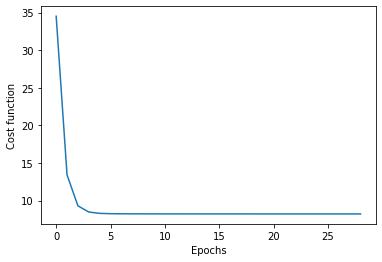

In [71]:
plt.plot(range(len(J)) , J)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Cost function', fontsize = 10)
plt.show()

<div style="direction:rtl"> حال خط به دست آمده از یادگیری شبکه‌ی آدلاین را رسم می‌کنیم: </div>

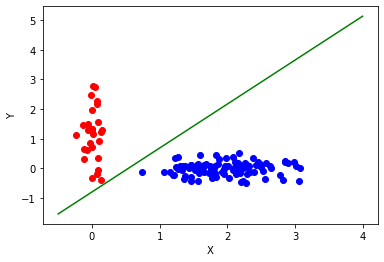

In [72]:
l1 = -w[1] / w[2]
l0 = -w[0] / w[2]

plt.scatter(x1, y1, color = 'blue')
plt.scatter(x2, y2, color = 'red')

x_line = np.linspace(-0.5 , 4 , 40)
plt.plot(x_line, l1 * x_line + l0, color = 'green')

plt.xlabel('X', fontsize=10)
plt.ylabel('Y', fontsize=10)
plt.show()

<div style="direction:rtl"> <b> سوال ۴) </b> </div>
<div style="direction:rtl"> داده ها را متناسب با فرض سوال تولید و رسم می‌کنیم: </div>

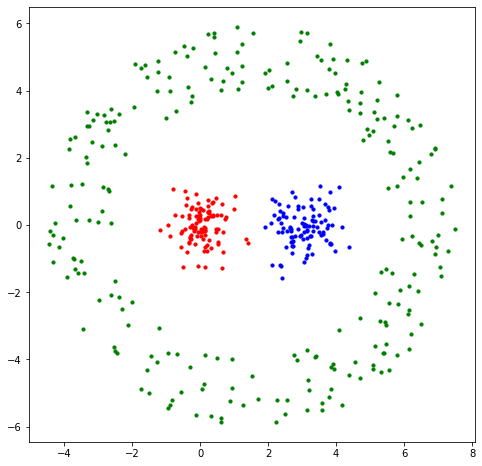

In [56]:
x1 = np.random.normal(3, 0.5, 100)
y1 = np.random.normal(0, 0.5, 100)

x2 = np.random.normal(0, 0.5, 100)
y2 = np.random.normal(0, 0.5, 100)

r = np.random.uniform(4 * 4 , 6 * 6, 250)
fi = np.random.uniform(0, 2 * np.pi, 250)

x3 = (sqrt(r) * cos(fi)) + 1.5
y3 = sqrt(r) * sin(fi)

plt.figure(figsize=(8 , 8))
plt.scatter(x1, y1, color = 'blue', s = 10)
plt.scatter(x2, y2, color = 'red', s = 10)
plt.scatter(x3, y3, color = 'green', s = 10)

plt.show()

<div style="direction:rtl"> حال شبکه‌ی Madaline را به روش MRI پیاده سازی می‌کنیم: </div>

In [60]:
class MyMadaline:
    def __init__(self, inputCnt, lr):
        self._inputCnt = inputCnt
        self._lr = lr
        
        self.inputNeuronsList = []
        for i in range(inputCnt + 1):
            self.inputNeuronsList.append(Neuron(theta=0, activationFunction=self._activationFunction))
        self.inputNeuronsList[0].setOutput(1)
        
        self.hiddenNeuronsList = []
        self.hiddenNeuronsList.append(Neuron(theta=0, activationFunction=self._activationFunction))
        for i in range(8):
            self.hiddenNeuronsList.append(Neuron(theta=0, activationFunction=self._activationFunction, inputNeuronsList=self.inputNeuronsList, weightsList=[0 for i in range(inputCnt + 1)]))
        self.hiddenNeuronsList[0].setOutput(1)
                                     
        self.outputNeuronsList = []

        self.outputNeuronsList.append(Neuron(theta=0, activationFunction=self._activationFunction, 
                                inputNeuronsList=[self.hiddenNeuronsList[0], self.hiddenNeuronsList[1], 
                                self.hiddenNeuronsList[2], self.hiddenNeuronsList[3], self.hiddenNeuronsList[4]],  
                                weightsList=[0.75, 0.25, 0.25, 0.25, 0.25]))

        self.outputNeuronsList.append(Neuron(theta=0, activationFunction=self._activationFunction, 
                                inputNeuronsList=[self.hiddenNeuronsList[0], self.hiddenNeuronsList[5], 
                                self.hiddenNeuronsList[6], self.hiddenNeuronsList[7], self.hiddenNeuronsList[8]],
                                weightsList=[0.75, 0.25, 0.25, 0.25, 0.25]))
    
    def _activationFunction(self, net, theta=0):
        if net >= theta:
            return 1
        else:
            return -1
    
    def _calculateNetworkOutput(self, inputValues):        
        for i in range(0, self._inputCnt):
            self.inputNeuronsList[i + 1].setOutput(inputValues[i])
        for i in range(1, len(self.hiddenNeuronsList)):
            self.hiddenNeuronsList[i].calculateOutput()
        for i in range(len(self.outputNeuronsList)):
            self.outputNeuronsList[i].calculateOutput()
    
    def _initialWeights(self):
        for i in range(1, len(self.hiddenNeuronsList)):
            newWeights = [0 for j in range(self._inputCnt + 1)]
            for j in range(self._inputCnt + 1):
                newWeights[j] = random.random()
            self.hiddenNeuronsList[i].setWeights(newWeights)
        
    def _updateNeuronWeight(self, nIndex, target, inputValues):
        net = self.hiddenNeuronsList[nIndex].calculateNet()

        oldWeights = self.hiddenNeuronsList[nIndex].getWeights()
        newWeights = [0 for i in range(self._inputCnt + 1)]

        newWeights[0] = oldWeights[0] + self._lr * (target - net)
        for i in range(self._inputCnt):
            newWeights[i + 1] = oldWeights[i + 1] + self._lr * (target - net) * inputValues[i]
        self.hiddenNeuronsList[nIndex].setWeights(newWeights)        
        
    def _updateWeights(self, target, inputValues):
        if self.outputNeuronsList[0].output != target[0]: 
            if target[0] == 1:
                nIndex = 1
                bestNet = abs(self.hiddenNeuronsList[1].calculateNet())
                for i in range(2, 5):
                    curNet = abs(self.hiddenNeuronsList[i].calculateNet())
                    if curNet < bestNet:
                        nIndex = i
                        bestNet = curNet
                self._updateNeuronWeight(nIndex, target[0], inputValues)
            else:
                for i in range(1, 5):
                    net = self.hiddenNeuronsList[i].calculateNet()
                    if net > 0:
                        self._updateNeuronWeight(i, target[0], inputValues)
                        
        if self.outputNeuronsList[1].output != target[1]: 
            if target[1] == 1:
                nIndex = 5
                bestNet = abs(self.hiddenNeuronsList[5].calculateNet())
                for i in range(6, 9):
                    curNet = abs(self.hiddenNeuronsList[i].calculateNet())
                    if curNet < bestNet:
                        nIndex = i
                        bestNet = curNet
                self._updateNeuronWeight(nIndex, target[1], inputValues)
            else:
                for i in range(5, 9):
                    net = self.hiddenNeuronsList[i].calculateNet()
                    if net > 0:
                        self._updateNeuronWeight(i, target[1], inputValues)
    
    def train(self, inputList, targetList):
        self._initialWeights()
        for cnt in range(150):
            for i in range(len(inputList)):
                self._calculateNetworkOutput(inputList[i])
                self._updateWeights(targetList[i], inputList[i])
        return self.hiddenNeuronsList[1:]

<div style="direction:rtl"> داده های تولید شده را label می‌زنیم و بعد از بر زدن به شبکه می‌دهیم: </div>

In [61]:
myNetwork = MyMadaline(2, 0.01)
adNetworkInputList = [0 for i in range(len(x1) + len(x2) + len(x3))]
inputValues = [0 for i in range(len(x1) + len(x2) + len(x3))]
targetList = [0 for i in range(len(x1) + len(x2) + len(x3))]

for i in range(len(x1)):
    adNetworkInputList[i] = ((x1[i], y1[i]), [1,-1])
for i in range(len(x2)):
    adNetworkInputList[len(x1) + i] = ((x2[i], y2[i]), [-1, 1])
for i in range(len(x3)):
    adNetworkInputList[len(x1) + len(x2) + i] = ((x3[i], y3[i]), [1, 1])

random.shuffle(adNetworkInputList)
    
for i in range(len(adNetworkInputList)):
    inputValues[i] = adNetworkInputList[i][0]
    targetList[i] = adNetworkInputList[i][1]
    
hiddenNeurons = myNetwork.train(inputValues, targetList)
learnedWeights = []
for n in hiddenNeurons:
    learnedWeights.append(n.getWeights())

<div style="direction:rtl"> خروجی شبکه به این صورت می‌شود: </div>

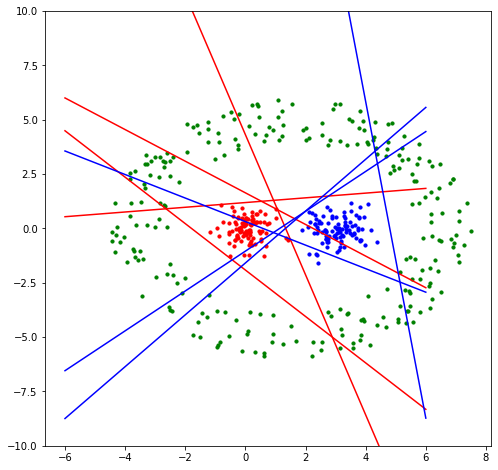

In [62]:
plt.figure(figsize=(8 , 8))
plt.ylim([-10, 10])
plt.scatter(x1, y1, color = 'blue', s = 10)
plt.scatter(x2, y2, color = 'red', s = 10)
plt.scatter(x3, y3, color = 'green', s = 10)

for i in range(len(learnedWeights)):
    if i < 4:
        drawLine(learnedWeights[i], 'red')
    else:
        drawLine(learnedWeights[i], 'blue')

plt.show()
